#Important Notes and Resources

**Purpose & Learning Goals**

The purpose of problem set 1 is to help you identify if you will need to spend some time getting caught up on your coding skills.  It is designed to take no more than thirty minutes, and is worth 1% of your course grade. If you are finding this problem set challenging, please watch the Coding Tutorial videos.  You can also reach out to the teaching team with concerns or questions.

**Getting Started**

To get started, first save a copy of this colab notebook to your "My Drive". You will also need to save the two datafiles on Canvas (bedstuy_bikedata.csv, and weather_data.csv) to your "My Drive."

**Resources**

If you are new to Python, pandas or Google CoLab, you may find the tutorial videos available in the Coding Resources module helpful.  These videos walk you through many of the steps that you need to complete this problem set.  The discussion section on Friday will also cover coding in Python with pandas.

**Context**

In this problem set, we will be using data on bikeshare rides taken in the Bedford-Stuyvesant neighborhood in Brooklyn, NY in 2015 & 2106.

Bike share systems have potential to improve transportaion opportunities, mobility and health outcomes, but ridership rates can vary greatly by neighborhood. In particular, ridership in the Bed-Stuy neighborhood, a low-income neighborhood, was well below the citywide average in 2014.

In 2015, a grant-funded partnership was led by Restoration, a community-based development corporation with 50 years of established trust in the community. Partnership programming was woven into existing programming, showing local residents how Citi Bike could serve them in their daily lives. The number of Citi Bike rides increased dramatically over the term of the Partnership's work.

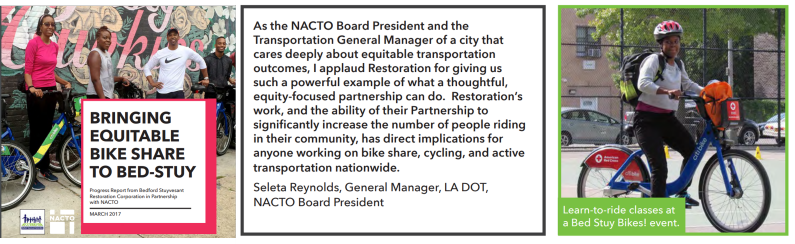


In [12]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/DATASCI 154/PS1"

# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "PS1_AndrewYu.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2
!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/Stanford Summer Session/DATASCI 154/PS1
[Errno 2] No such file or directory: 'Stanford Summer Session/DATASCI 154/PS1'
/content/drive/My Drive/Stanford Summer Session/DATASCI 154/PS1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-plain-generic is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
#Run this cell first by hitting the play button to load packages that you'll need in this pset

#Packages for working with data
# Modin is a drop-in replacement for pandas, with multiple advantages
!pip install "modin[dask]"

import numpy as np
import modin.pandas as pd


# Part 0: Reading data



1. Load in the bike data file bedstuy_bikedata.csv using read_csv from the pandas module. Print the first five rows of your data frame.

In [3]:
#use pd.read_csv() to load the survey data and the pulse data.
#The only argument to the argument to the pd.read_csv() function is the path or location of your file.
#The path will have this format '/content/drive/My Drive/NAME OF DATASET.csv' if you have saved the dataset in "My Drive" in your Google drive.
#Your code should have the format your_dataframe_name = pd.read_csv(path_name)

bike_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/bedstuy_bikedata.csv")
bike_df

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33599
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46579'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33825'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36657', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36657
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43064
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45077', name: 0, s

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,37,969,1/1/2015 0:27,1/1/2015 0:43,244,Willoughby Ave & Hall St,40.691960,-73.965369,321,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,16195,Subscriber,1964.0,1
1,52,527,1/1/2015 0:32,1/1/2015 0:40,244,Willoughby Ave & Hall St,40.691960,-73.965369,261,Johnson St & Gold St,40.694749,-73.983625,17898,Subscriber,1980.0,1
2,53,486,1/1/2015 0:32,1/1/2015 0:40,244,Willoughby Ave & Hall St,40.691960,-73.965369,261,Johnson St & Gold St,40.694749,-73.983625,20782,Subscriber,1982.0,2
3,61,598,1/1/2015 0:35,1/1/2015 0:45,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,437,Macon St & Nostrand Ave,40.680983,-73.950048,18029,Subscriber,1988.0,1
4,62,583,1/1/2015 0:35,1/1/2015 0:45,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,437,Macon St & Nostrand Ave,40.680983,-73.950048,16751,Subscriber,1988.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555721,812112,4715,2016-12-31 23:34:05,2017-01-01 00:52:40,244,Willoughby Ave & Hall St,40.691960,-73.965369,313,Washington Ave & Park Ave,40.696102,-73.967510,19094,Customer,NaN,0
555722,812124,1917,2016-12-31 23:37:32,2017-01-01 00:09:30,3060,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,3349,Grand Army Plaza & Plaza St West,40.672968,-73.970880,24876,Subscriber,1985.0,1
555723,812133,311,2016-12-31 23:39:32,2016-12-31 23:44:43,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,430,York St & Jay St,40.701485,-73.986569,25041,Subscriber,1989.0,1
555724,812144,478,2016-12-31 23:41:26,2016-12-31 23:49:24,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,26136,Subscriber,1987.0,1


In [4]:
#look at first rows of data
bike_df.head(5)

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,37,969,1/1/2015 0:27,1/1/2015 0:43,244,Willoughby Ave & Hall St,40.691960,-73.965369,321,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,16195,Subscriber,1964.0,1
1,52,527,1/1/2015 0:32,1/1/2015 0:40,244,Willoughby Ave & Hall St,40.691960,-73.965369,261,Johnson St & Gold St,40.694749,-73.983625,17898,Subscriber,1980.0,1
2,53,486,1/1/2015 0:32,1/1/2015 0:40,244,Willoughby Ave & Hall St,40.691960,-73.965369,261,Johnson St & Gold St,40.694749,-73.983625,20782,Subscriber,1982.0,2
3,61,598,1/1/2015 0:35,1/1/2015 0:45,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,437,Macon St & Nostrand Ave,40.680983,-73.950048,18029,Subscriber,1988.0,1
4,62,583,1/1/2015 0:35,1/1/2015 0:45,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,437,Macon St & Nostrand Ave,40.680983,-73.950048,16751,Subscriber,1988.0,2


# Part 1: Wrangling data


2. Suppose that there are only a few variables in the bike data that you will need. Create a new dataframe where you only keep 3 columns:'Trip Duration', 'Start Time' and 'User Type'

In [5]:
#Only keep 3 columns: Trip Duration, Start Time and User Type

bike_df_new = pd.read_csv("bedstuy_bikedata.csv", usecols=["Trip Duration", "Start Time", "User Type"])
bike_df_new

,Trip Duration,Start Time,User Type
0,969,1/1/2015 0:27,Subscriber
1,527,1/1/2015 0:32,Subscriber
2,486,1/1/2015 0:32,Subscriber
3,598,1/1/2015 0:35,Subscriber
4,583,1/1/2015 0:35,Subscriber
...,...,...,...
555721,4715,2016-12-31 23:34:05,Customer
555722,1917,2016-12-31 23:37:32,Subscriber
555723,311,2016-12-31 23:39:32,Subscriber
555724,478,2016-12-31 23:41:26,Subscriber


3. Create a new dataframe where you only keep rows that coorespond to rides that may be recreational, which we define as rides greater than twenty minutes (1200 seconds).

In [6]:
#only contains rides that may be "recreational", which we define as rides greater than twenty minutes (1200 seconds))
bike_df_recreational = bike_df_new[bike_df_new["Trip Duration"] > 1200]
bike_df_recreational

,Trip Duration,Start Time,User Type
23,1504,1/1/2015 2:47,Subscriber
30,1569,1/1/2015 4:28,Subscriber
45,1577,1/1/2015 11:49,Subscriber
52,1320,1/1/2015 12:05,Subscriber
53,1346,1/1/2015 12:06,Subscriber
...,...,...,...
555705,1545,2016-12-31 22:53:11,Subscriber
555708,1723,2016-12-31 23:00:35,Subscriber
555712,1360,2016-12-31 23:03:16,Subscriber
555721,4715,2016-12-31 23:34:05,Customer


# Part 2: Working with time series data

4. Use pandas to_datetime (pd.to_datetime) to convert the 'Start Time' variable to a datetime object.

In [7]:
#Convert data to datetime
# X format='%Y-%m-%d', as time is still present. Hence, normalize to set to 0000, aka removing time component
bike_df_new["Start Time"] = pd.to_datetime(bike_df_new["Start Time"]).dt.normalize()
print(bike_df_new["Start Time"].info())
bike_df_new

<class 'modin.pandas.series.Series'>
RangeIndex: 555726 entries, 0 to 555725
Series name: Start Time
Non-Null Count   Dtype         
--------------   -----         
555726 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB
None


,Trip Duration,Start Time,User Type
0,969,2015-01-01,Subscriber
1,527,2015-01-01,Subscriber
2,486,2015-01-01,Subscriber
3,598,2015-01-01,Subscriber
4,583,2015-01-01,Subscriber
...,...,...,...
555721,4715,2016-12-31,Customer
555722,1917,2016-12-31,Subscriber
555723,311,2016-12-31,Subscriber
555724,478,2016-12-31,Subscriber


# Part 3: Merging data

5. Load the weather data 'weather_data.csv', then convert the weather data's 'DATE' variable to a datetime object using pandas pd.to_datetime.  Then us pandas pd.merge to merge the weather data with the bike data so that we know the daily weather for each ride. Hint: you should be adding the weather data to the bike data, so it may be helpful to do a "left" join.

In [8]:
#load weather data
weather_df = pd.read_csv("weather_data.csv")
weather_df

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00014732,"LAGUARDIA AIRPORT, NY US",1/1/2015,0.00,39,27
1,USW00014732,"LAGUARDIA AIRPORT, NY US",1/2/2015,0.00,42,35
2,USW00014732,"LAGUARDIA AIRPORT, NY US",1/3/2015,0.67,41,31
3,USW00014732,"LAGUARDIA AIRPORT, NY US",1/4/2015,0.31,57,41
4,USW00014732,"LAGUARDIA AIRPORT, NY US",1/5/2015,0.00,50,22
...,...,...,...,...,...,...
726,USW00014732,"LAGUARDIA AIRPORT, NY US",12/27/2016,0.00,62,42
727,USW00014732,"LAGUARDIA AIRPORT, NY US",12/28/2016,0.00,42,35
728,USW00014732,"LAGUARDIA AIRPORT, NY US",12/29/2016,0.48,48,34
729,USW00014732,"LAGUARDIA AIRPORT, NY US",12/30/2016,0.00,42,35


In [9]:
#convert weather data date to pandas datetime
weather_df["DATE"] = pd.to_datetime(weather_df["DATE"])
print(weather_df["DATE"].info())

<class 'modin.pandas.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB
None


In [10]:
#merge with the bike data so that we know the daily weather for each ride
merged_data = pd.merge(bike_df_new, weather_df, left_on="Start Time", right_on="DATE", how="left")
# As Start Time & Date are the same
merged_data.drop(["Start Time"], axis=1, inplace=True)
merged_data

,Trip Duration,User Type,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,969,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,0.0,39,27
1,527,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,0.0,39,27
2,486,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,0.0,39,27
3,598,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,0.0,39,27
4,583,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,0.0,39,27
...,...,...,...,...,...,...,...,...
555721,4715,Customer,USW00014732,"LAGUARDIA AIRPORT, NY US",2016-12-31,0.0,45,34
555722,1917,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2016-12-31,0.0,45,34
555723,311,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2016-12-31,0.0,45,34
555724,478,Subscriber,USW00014732,"LAGUARDIA AIRPORT, NY US",2016-12-31,0.0,45,34
